In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [ ]:
temperatura = ctrl.Antecedent(np.arange(0, 38, 1), "Temperatura") 
humidade = ctrl.Antecedent(np.arange(0, 101, 1), "Humidade")
potencia = ctrl.Consequent(np.arange(0, 101, 1), "Potencia")

temperatura.automf(3, names=["baixa", "media" , "alta" ]) 
humidade.automf(3, names=["baixa", "media" , "alta" ])
potencia.automf(3, names=["baixa", "media" , "alta" ]) 

In [ ]:
rule1 = ctrl.Rule(temperatura["baixa"] & humidade["baixa"], potencia["alta"])
rule2 = ctrl.Rule(temperatura["baixa"] & humidade["media"], potencia["baixa"])
rule3 = ctrl.Rule(temperatura["baixa"] & humidade["alta"], potencia["baixa"])
rule4 = ctrl.Rule(temperatura["media"] & humidade["baixa"], potencia["alta"])
rule5 = ctrl.Rule(temperatura["media"] & humidade["media"], potencia["baixa"])
rule6 = ctrl.Rule(temperatura["media"] & humidade["alta"], potencia["media"])
rule7 = ctrl.Rule(temperatura["alta"] & humidade["baixa"], potencia["media"])
rule8 = ctrl.Rule(temperatura["alta"] & humidade["media"], potencia["media"])
rule9 = ctrl.Rule(temperatura["alta"] & humidade["alta"], potencia["alta"])

In [ ]:
potencia_ctrl = ctrl.ControlSystem([rule1, rule2, rule3 ,rule4 , rule5 , rule6 , rule7 , rule8 , rule9 ]) 
potenciando = ctrl.ControlSystemSimulation(potencia_ctrl)

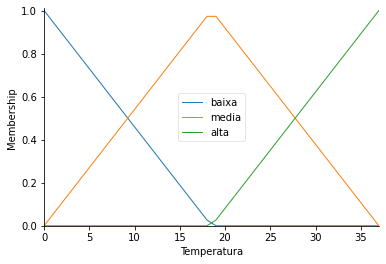

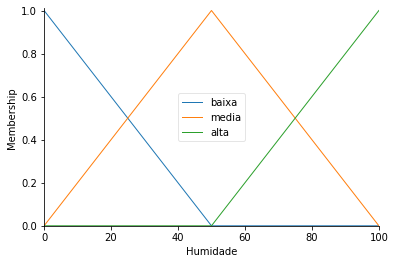

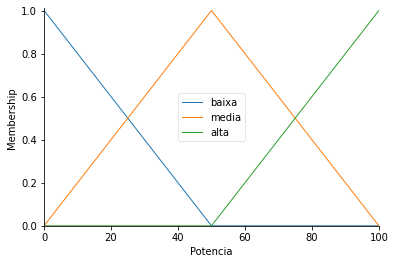

In [ ]:
temperatura.view()
humidade.view()
potencia.view()

44.999517327927464


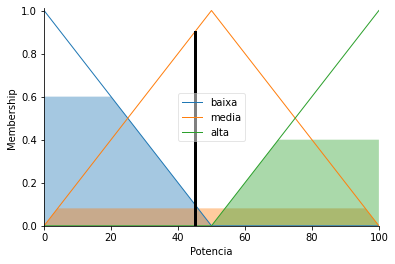

In [ ]:
potenciando.input["Temperatura"] = 20
potenciando.input["Humidade"] = 30

potenciando.compute()

print(potenciando.output["Potencia"])
potencia.view(sim=potenciando)

51.133399328373415


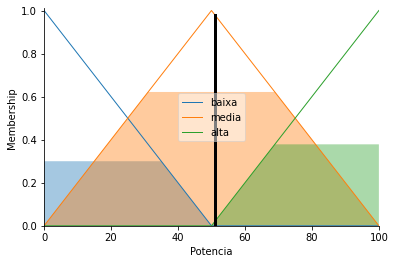

In [ ]:
potenciando.input["Temperatura"] = 30
potenciando.input["Humidade"] = 15

potenciando.compute()

print(potenciando.output["Potencia"])
potencia.view(sim=potenciando)

49.99999999999997


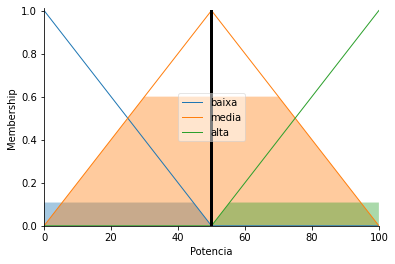

In [ ]:
potenciando.input["Temperatura"] = 35
potenciando.input["Humidade"] = 30

potenciando.compute()

print(potenciando.output["Potencia"])
potencia.view(sim=potenciando)

42.199155757449326


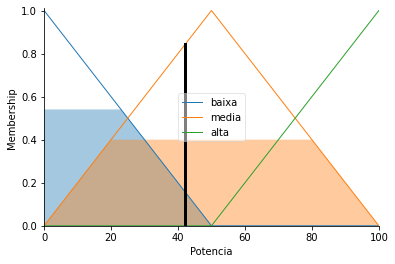

In [ ]:
potencia_2.input["Temperatura"] = 10
potencia_2.input["Humidade"] = 70

potencia_2.compute()

print(potencia_2.output["Potencia"])
potencia.view(sim=potencia_2)